# Introduction

# Imports

In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import PIL
import PIL.ImageDraw

Limit TensorFlow GPU memory usage

In [2]:
import tensorflow as tf
gpu_options = tf.GPUOptions(allow_growth=True)  # init TF ...
config=tf.ConfigProto(gpu_options=gpu_options)  # w/o taking ...
with tf.Session(config=config): pass            # all GPU memory

# Load Dataset

In [3]:
dataset_location = '/home/marcin/Datasets/cat-dataset/cats/'

In [4]:
folders_all = ['CAT_00', 'CAT_01', 'CAT_02', 'CAT_03', 'CAT_04', 'CAT_05', 'CAT_06']

In [5]:
def build_image_files_list(folders):
    image_files_list = []
    for folder in folders:
        wild_path = os.path.join(dataset_location, folder, '*.jpg')
        image_files_list.extend(sorted(glob.glob(wild_path)))
    return image_files_list

In [6]:
image_paths_all = build_image_files_list(folders_all)

In [7]:
len(image_paths_all)

9997

In [41]:
def load_keypoints(path):    
    """
        .cat file format is: 'nb_keypoints x1, y1, x2, y2, ...'
    """
    with open(path, 'r') as f:
        line = f.read().split()  # [nb_keypoints, x1, y1, x2, y2, ...]
    keypoints_nb = int(line[0])
    keypoints_1d = np.array(line[1:], dtype=int)
    keypoints_xy = keypoints_1d.reshape((-1, 2))
    assert keypoints_nb == len(keypoints_xy)
    assert keypoints_nb == 9
    return keypoints_xy

In [9]:
img = PIL.Image.open(image_paths_all[0])
kps = load_keypoints(image_paths_all[0]+'.cat')

In [10]:
def draw_keypoints(img, keypoints, r=3, c='red'):
    draw = PIL.ImageDraw.Draw(img)
    for x, y in keypoints:
        draw.ellipse([x-r, y-r, x+r, y+r], c)
    return img

In [16]:
print(kps)

[[175 160]
 [239 162]
 [199 199]
 [149 121]
 [137  78]
 [166  93]
 [281 101]
 [312  96]
 [296 133]]


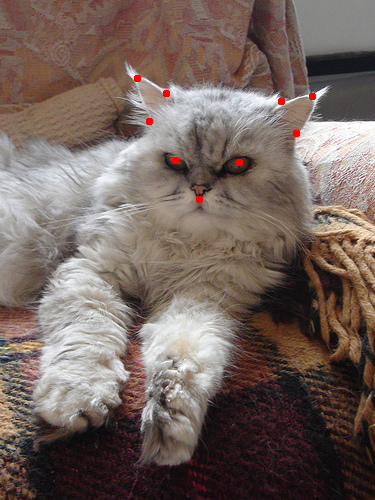

In [17]:
display(draw_keypoints(img.copy(), kps))

In [27]:
def scale_img_kps(image, keypoints):
    width, height = image.size
    ratio_w = width / 224
    ratio_h = height / 224
    
    image_new = image.resize((224, 224), resample=PIL.Image.LANCZOS)
    
    keypoints_new = np.zeros_like(keypoints)
    keypoints_new[range(len(keypoints_new)), 0] = keypoints[:,0] / ratio_w
    keypoints_new[range(len(keypoints_new)), 1] = keypoints[:,1] / ratio_h
    
    return image_new, keypoints_new

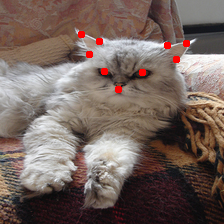

In [28]:
img2, kps2 = scale_img_kps(img, kps)
display(draw_keypoints(img2.copy(), kps2))

In [38]:
def load_image_keypoints(image_path, keypoints_path):
    image = PIL.Image.open(image_path)
    keypoints = load_keypoints(keypoints_path)
    image_new, keypoints_new = scale_img_kps(image, keypoints)
    return image, keypoints, image_new, keypoints_new

In [39]:
image, keypoints, image_new, keypoints_new = \
    load_image_keypoints(image_paths_all[idx], image_paths_all[idx]+'.cat')

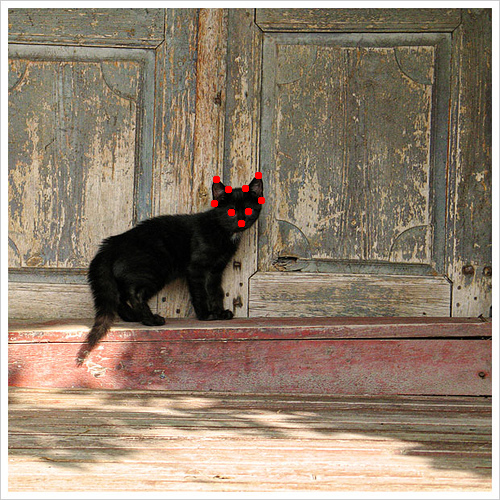

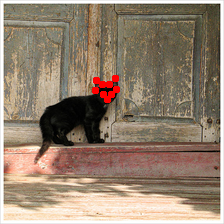

In [40]:
display(draw_keypoints(image.copy(), keypoints))
display(draw_keypoints(image_new.copy(), keypoints_new))

In [65]:
images_list = []
keypoints_list = []
for i, image_path in enumerate(image_paths_all):
    _, _, image_new, keypoints_new = \
        load_image_keypoints(image_path, image_path+'.cat')
    
    image_arr = np.array(image_new)
    assert image_arr.shape == (224, 224, 3)
    assert 0 <= image_arr.min() <= 255

    images_list.append(image_arr)
    keypoints_list.append(keypoints_new)
    
    if i % 1000 == 0:
        print('i:', i)

i: 0
i: 1000
i: 2000
i: 3000
i: 4000
i: 5000
i: 6000
i: 7000
i: 8000
i: 9000


In [66]:
images = np.array(images_list)

In [67]:
keypoints = np.array(keypoints_list)

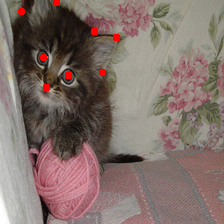

In [91]:
idx = i
display(draw_keypoints(PIL.Image.fromarray(images[idx]).copy(), keypoints[idx]))